In [5]:
%load_ext autoreload
%autoreload 2
from naplab import process_frame, parse_camera_json, filter_cameras
from utils import plot_2d, plot_3d, plot_directions


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
cameraList = parse_camera_json("./Trip094/camerasandCanandGnssCalibratedAll_lidars00-virtual.json")
c5_r1, c7_l2 = filter_cameras(cameraList, ["C5_R1", "C7_L2"])

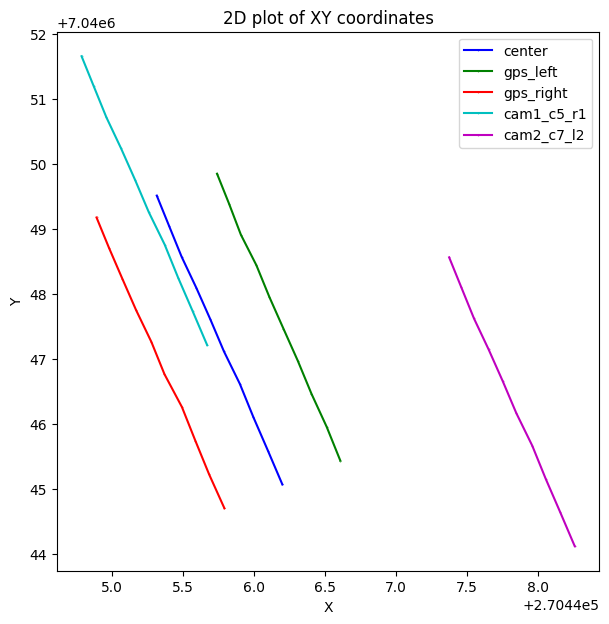

In [7]:

data = process_frame("./Trip094/gnss094_50.txt", "./Trip094/gnss094_52.txt")

gps_left = [frame.left_point for frame in data]
gps_right = [frame.right_point for frame in data]
center = [frame.center for frame in data]
max_index = 10
cam1_pos = [c5_r1.get_camera_position(frame) for frame in data[:max_index]]
cam2_pos = [c7_l2.get_camera_position(frame) for frame in data[:max_index]]
plot_2d([center[:max_index], gps_left[:max_index], gps_right[:max_index], cam1_pos, cam2_pos], labels=["center", "gps_left", "gps_right", "cam1_c5_r1", "cam2_c7_l2"], figsize=(7, 7))



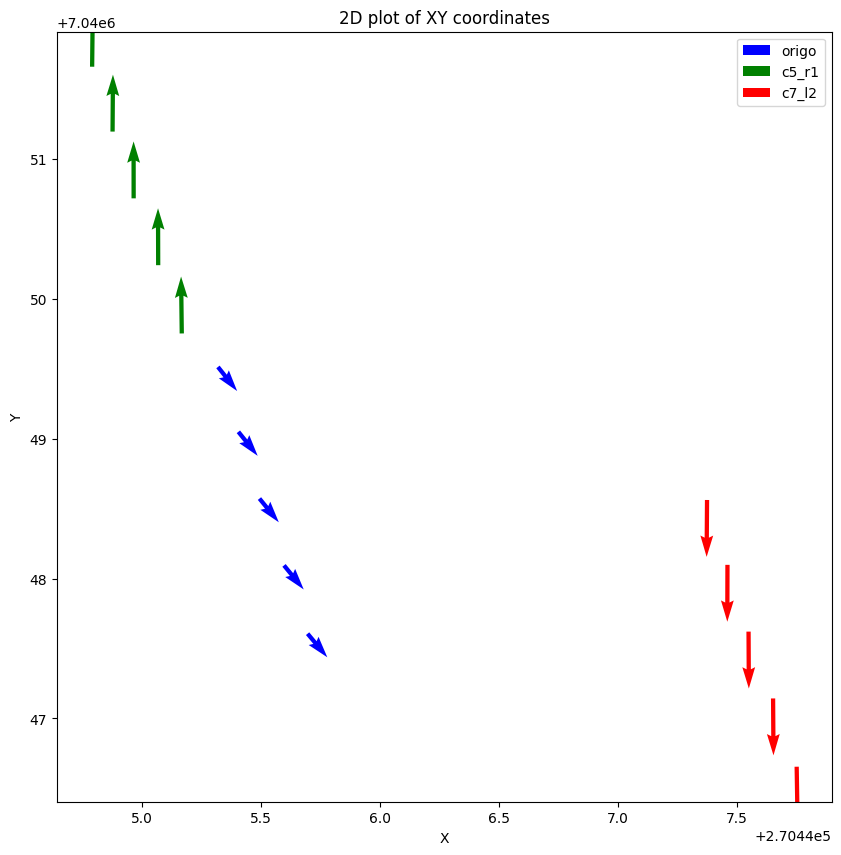

In [4]:
max_index = 5
cardir = [frame.direction for frame in data][:max_index]
dir1 = [c5_r1.get_camera_direction_vector(frame) for frame in data][:max_index]
dir2 = [c7_l2.get_camera_direction_vector(frame) for frame in data][:max_index]

directions = [cardir, dir1, dir2]
positions = [center[:max_index], cam1_pos[:max_index], cam2_pos[:max_index]]
labels = ["center", "c5_r1", "c7_l2"]
plot_directions(positions, directions, labels, figsize=(10, 10))
